## Cats vs Dogs 

In [ ]:
%reset

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import glob
from PIL import Image
import scipy
import cv2
import csv
import PIL
import pylab as pl
from IPython import display
import time

%matplotlib inline


### Formatting input data as nupy arrays

In [ ]:
# Input parameters  
data_path = "/home/roberts/data/DogsVsCats_medium/"
csv_path = data_path[0:-1] + ".csv"
input_width = 100
input_height = 100
train_to_valid = 0.8
data_size = len([f for f in os.listdir(data_path)])



def create_csv_file(path, csv_path):
    """Creates csv file describing all files in folder PATH. Function must be changed for other datasets,
    to create appropriate labels!!!"""

    csv_path = path[0:-1] + ".csv"
    file = open(csv_path, "w")
    for i in os.listdir(path):
        file.write(path + i)
        if i[0] == "c":
            file.write(", 0\n")
        else:
            file.write(", 1\n")
            
            
def create_numpy_arrays(data_path, csv_path, data_size, input_width, input_height):
    """Creates numpy array from all images in the data folder"""
    
    # Memory allocation
    images = np.empty([data_size, input_width, input_height, 3], dtype="uint8") # "dtype=uint8"
    labels = np.empty([data_size], dtype="uint8")
    
    with open(csv_path, 'rb') as csv_file:
        reader = csv.reader(csv_file)
        i = 0
        for row in reader:
        
            image = Image.open(row[0])
            image = np.array(image.resize((input_width, input_height), PIL.Image.ANTIALIAS))
            images[i,:] = image
            labels[i] = np.array( row[1] ).astype(int)
            i = i+1
            
        return(images, labels)
    

def divide_train_validate(train_to_valid, data_size, input_width, input_height):
    "Separates input images and labels into train and validation sets"
    train_size = int(data_size * train_to_valid)
    test_size = data_size - train_size
    vect_rand = np.append(np.zeros(train_size), np.zeros(test_size) + 1)
    np.random.shuffle(vect_rand)
    
    # Memory allocation
    images_train = np.empty([train_size, input_width, input_height, 3], dtype="uint8") # Allocate MEMORY
    labels_train = np.empty([train_size], dtype="uint8") 
    images_test = np.empty([test_size, input_width, input_height, 3], dtype="uint8") 
    labels_test = np.empty([test_size], dtype="uint8")
    
    i_train = 0
    i_test = 0
    for i in range(data_size):
        if vect_rand[i] < 0.1:
            images_train[i_train,:] = images[i,:]
            labels_train[i_train] = labels[i]
            i_train = i_train + 1
        else:
            images_test[i_test,:] = images[i,:]
            labels_test[i_test] = labels[i]
            i_test = i_test + 1
    
    return(images_train, labels_train, images_test, labels_test)
    

def save_divided_datasets(path, images_train, labels_train, images_test, labels_test):
    # Saving the separated databese
    np.save(path[0:-1] + "_train", images_train)
    np.save(path[0:-1] + "_train_labels", labels_train)
    np.save(path[0:-1] + "_test", images_test)
    np.save(path[0:-1] + "_test_labels", labels_test)
                
    


print ">> creating csv file.."
create_csv_file(data_path, csv_path)

print ">> creating numpy array.."
images, labels = create_numpy_arrays(data_path, csv_path, data_size, input_width, input_height)

print ">> dividing training and validation sets.."
images_train, labels_train, images_test, labels_test = divide_train_validate(train_to_valid, data_size, input_width, input_height)

print ">> saving divided datasets.."
save_divided_datasets(data_path, images_train, labels_train, images_test, labels_test)




### Loading input data (numpy arrays)

Training data:  (67, 100, 100, 3)
Testing data:  (17, 100, 100, 3)


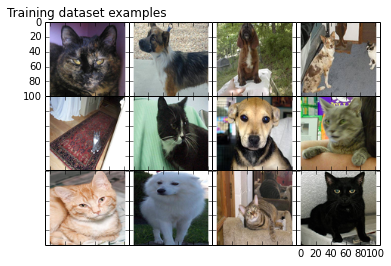

Image Nr 0


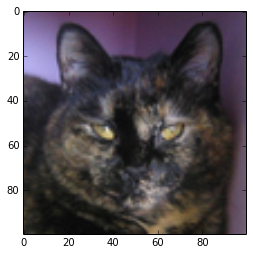

In [2]:
data_path = "/home/roberts/data/DogsVsCats_medium/"
n_classes = 2

images_train = np.load(data_path[0:-1] + "_train.npy")
labels_train = np.load(data_path[0:-1] + "_train_labels.npy")
images_test = np.load(data_path[0:-1] + "_test.npy")
labels_test = np.load(data_path[0:-1] + "_test_labels.npy")

#images_train = images_train.astype(float)
#labels_train = labels_train.astype(float)


def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors."""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[(index_offset + labels_dense.ravel()).astype(int)] = 1
    return labels_one_hot



# PREPROCESSING
labels_train = dense_to_one_hot(labels_train, num_classes=2)
labels_test = dense_to_one_hot(labels_test, num_classes=2)

# Typecasting and normalizing
images_train = images_train.astype(float) / 255.
images_test = images_test.astype(float) / 255.
 

# VISUALIZATION OF TRAINING DATA
print "Training data: ", images_train.shape
print "Testing data: ", images_test.shape
    
# Display few training examples as subimages
f, ((ax00, ax01, ax02, ax03), (ax10, ax11, ax12, ax13), (ax20, ax21, ax22, ax23)) = plt.subplots(3, 4, sharex=True, sharey=True)
ax00.set_title('Training dataset examples')
ax00.imshow(images_train[0,:])
ax01.imshow(images_train[1,:])
ax02.imshow(images_train[2,:])
ax03.imshow(images_train[3,:])
ax10.imshow(images_train[4,:])
ax11.imshow(images_train[5,:])
ax12.imshow(images_train[6,:])
ax13.imshow(images_train[7,:])
ax20.imshow(images_train[8,:])
ax21.imshow(images_train[9,:])
ax22.imshow(images_train[10,:])
ax23.imshow(images_train[11,:])
f.subplots_adjust(hspace=0)
f.subplots_adjust(wspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.setp([a.get_yticklabels() for a in f.axes[1:]], visible=False)
plt.show()
    

# Display first image in the training data
print "Image Nr 0"
plt.imshow(images_train[0,:])
plt.show()
print



### Parameters

In [ ]:
# Parameters
learning_rate = 0.001
training_epochs = 5
batch_size = 5
display_step = 1 # not used yet

dropout = 0.8

saveLogGraphic = False # If true, a training log will be saved as graphic
logGraphicName = "CatsVsDogs_medium.ps"

# GPU parameters
gpu_used = '/gpu:1'
LOG_DEVICE_PLACEMENT = False # If true, yoou can see wich operations are performed on which devices
#GPU_OPTIONS = tf.GPUOptions(per_process_gpu_memory_fraction=0.5) # % of GPU memory to use
ALLOW_SOFT_PLACEMENT = True  # If True, Tensorflow automatically decides if specific operation has to be done on CPU
LOG_DEVICE_PLACEMENT = False # If True, output will show which operations are done on which devices



### Logistic regression

In [ ]:
# For this net, data (images n x w x h x 3) has to be reshaped as vectors (n x w*h*3)

input_width = images_train.shape[1]
input_height = images_train.shape[2]

images_train = images_train.reshape(images_train.shape[0], input_width * input_height * 3)
images_test = images_test.reshape(images_test.shape[0], input_width * input_height * 3)

with tf.device(gpu_used):
    # Graph input
    x = tf.placeholder("float", [None, input_width * input_height * 3]) # 100x100x3
    y = tf.placeholder("float", [None, 2])

    # Model
    w = tf.Variable(tf.zeros([input_width * input_height * 3, 2]))
    b = tf.Variable(tf.zeros([2]))

    activation = tf.nn.softmax(tf.matmul(x, w) + b)

    cost = -tf.reduce_sum(y*tf.log(activation))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
    init = tf.initialize_all_variables()

    prediction = activation
    
    correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.types.float32)) # works on cpu only? why?
    
   

### Alexnet

In [ ]:
with tf.device(gpu_used): 
    
    x = tf.placeholder(tf.types.float32, [None, images_train.shape[1], images_train.shape[2], images_train.shape[3]])
    y = tf.placeholder(tf.types.float32, [None, n_classes])
    keep_prob = tf.placeholder(tf.types.float32) # dropout (keep probability)


    def conv2d(name, l_input, w, b):
        return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1],
                                                         padding='SAME'),b), name=name)

    def max_pool(name, l_input, k):
        return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                                 padding='SAME', name=name)

    def norm(name, l_input, lsize=4):
        return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)


    def alex_net(_X, _weights, _biases, _dropout):

        conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'])
        pool1 = max_pool('pool1', conv1, k=2)
        norm1 = norm('norm1', pool1, lsize=4)
        norm1 = tf.nn.dropout(norm1, _dropout)

        conv2 = conv2d('conv2', norm1, _weights['wc2'], _biases['bc2'])
        pool2 = max_pool('pool2', conv2, k=2)
        norm2 = norm('norm2', pool2, lsize=4)
        norm2 = tf.nn.dropout(norm2, _dropout)

        conv3 = conv2d('conv3', norm2, _weights['wc3'], _biases['bc3'])
        pool3 = max_pool('pool2', conv3, k=2)
        norm3 = norm('norm3', pool3, lsize=4)
        norm3 = tf.nn.dropout(norm3, _dropout)

        dense1 = tf.reshape(norm3, [-1, _weights['wd1'].get_shape().as_list()[0]])
        dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1')    
        dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2')

        out = tf.matmul(dense2, _weights['out']) + _biases['out']

        return out



# Store layers weight & bias
# When pooling with k=2, if image was 25x25, then result is 13x13
    weights = {
        'wc1': tf.Variable(tf.random_normal([3, 3, 3, 64])), # color rgb # [3, 3, 3, 64]
        'wc2': tf.Variable(tf.random_normal([3, 3, 64, 128])), # [3, 3, 64, 128]
        'wc3': tf.Variable(tf.random_normal([3, 3, 128, 256])), # [3, 3, 128, 256]
        'wd1': tf.Variable(tf.random_normal([13*13*256, 1024])), # [4*4*256, 1024]
        'wd2': tf.Variable(tf.random_normal([1024, 1024])), # [1024, 1024]
        'out': tf.Variable(tf.random_normal([1024, n_classes])) # [1024, n_classes]
    }
    biases = {
        'bc1': tf.Variable(tf.random_normal([64])),
        'bc2': tf.Variable(tf.random_normal([128])), # [128]
        'bc3': tf.Variable(tf.random_normal([256])), # [256]
        'bd1': tf.Variable(tf.random_normal([1024])), # [1024]
        'bd2': tf.Variable(tf.random_normal([1024])), # [1024]
        'out': tf.Variable(tf.random_normal([n_classes]))
    }


    pred = alex_net(x, weights, biases, keep_prob)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.types.float32))


    init = tf.initialize_all_variables()


### ResNet 

In [ ]:
with tf.device(gpu_used): 
    
    x = tf.placeholder(tf.types.float32, [None, images_train.shape[1], images_train.shape[2], images_train.shape[3]])
    y = tf.placeholder(tf.types.float32, [None, n_classes])
    keep_prob = tf.placeholder(tf.types.float32) # dropout (keep probability)
    
    
    def conv2d(name, l_input, w, b, stride_k):
        return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, stride_k, stride_k, 1],
                                                         padding='SAME'),b), name=name)
    
    def resnet(_X, _weights, _biases, _dropout):
        
        conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'], 1)
        conv2 = conv2d('conv2', conv1, _weights['wc2'], _biases['bc2'], 2)
        conv3 = conv2d('conv3', conv2, _weights['wc3'], _biases['bc3'], 1)
        conv4 = conv2d('conv4', conv3, _weights['wc4'], _biases['bc4'], 2)
        conv5 = conv2d('conv5', conv4, _weights['wc5'], _biases['bc5'], 1)
        conv6 = conv2d('conv6', conv5, _weights['wc6'], _biases['bc6'], 2)
        
        
        dense1 = tf.reshape(conv6, [-1, _weights['wd1'].get_shape().as_list()[0]])
        dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1')    
        dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2')

        out = tf.matmul(dense2, _weights['out']) + _biases['out']
        
        return out
    
    # When pooling with k=2, if image was 25x25, then result is 13x13
    weights = {
        'wc1': tf.Variable(tf.random_normal([3, 3, 3, 64])),
        'wc2': tf.Variable(tf.random_normal([3, 3, 64, 64])), 
        'wc3': tf.Variable(tf.random_normal([3, 3, 64, 128])),
        'wc4': tf.Variable(tf.random_normal([3, 3, 128, 128])),
        'wc5': tf.Variable(tf.random_normal([3, 3, 128, 256])), 
        'wc6': tf.Variable(tf.random_normal([3, 3, 256, 256])), 
        
        'wd1': tf.Variable(tf.random_normal([13*13*256, 1024])), 
        'wd2': tf.Variable(tf.random_normal([1024, 1024])), 
        'out': tf.Variable(tf.random_normal([1024, n_classes])) 
    }
    biases = {
        'bc1': tf.Variable(tf.random_normal([64])),
        'bc2': tf.Variable(tf.random_normal([64])), # [128]
        'bc3': tf.Variable(tf.random_normal([128])), # [256]
        'bc4': tf.Variable(tf.random_normal([128])), # [256]
        'bc5': tf.Variable(tf.random_normal([256])), # [256]
        'bc6': tf.Variable(tf.random_normal([256])), # [256]
        
        'bd1': tf.Variable(tf.random_normal([13*13*256, 1024])), # [1024]
        'bd2': tf.Variable(tf.random_normal([1024])), # [1024]
        'out': tf.Variable(tf.random_normal([n_classes]))
    }
    
    
    pred = resnet(x, weights, biases, keep_prob)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.types.float32))


    init = tf.initialize_all_variables()


    

### Running the session

In [ ]:
# Number of batches
total_batch = labels_train.shape[0]/batch_size
total_batch_test = labels_test.shape[0]/batch_size

# For visualization
epoch_viz = []
acc_train_viz = []
acc_test_viz = []


# Launching the graph. Allow soft placement
with tf.Session(config=tf.ConfigProto(allow_soft_placement=ALLOW_SOFT_PLACEMENT,
                                     log_device_placement=LOG_DEVICE_PLACEMENT)) as sess:
    # gpu_options=GPU_OPTIONS,
    
    sess.run(init)
    
    print
    for epoch in range(training_epochs):
        avg_cost = 0.
        
        # Shuffle input images every epoch    
        perm = np.arange(images_train.shape[0])
        np.random.shuffle(perm)
        images_train = images_train[perm]
        labels_train = labels_train[perm]
    
            
        for i in range(total_batch):
                
            images_train_batch = images_train[i*batch_size:i*batch_size + batch_size, :]
            labels_train_batch = labels_train[i*batch_size:i*batch_size + batch_size, :]


            sess.run(optimizer, feed_dict={x:images_train_batch, y:labels_train_batch,
                                          keep_prob:dropout})

            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x:images_train_batch, y:labels_train_batch,
                                                 keep_prob: 1.})/total_batch
            
        
        # Display logs every epoch
        if epoch % display_step == 0:

            acc_train_vec = []
            acc_test_vec = []

            for i in range(total_batch):
                images_train_batch = images_train[i*batch_size:i*batch_size + batch_size, :]
                labels_train_batch = labels_train[i*batch_size:i*batch_size + batch_size, :]
                
                acc_train_vec.append(sess.run(accuracy, feed_dict={x:images_train_batch, 
                                                         y:labels_train_batch, keep_prob:1.}))
            acc_train = np.mean(acc_train_vec)

               
            for i in range(total_batch_test):
                images_test_batch = images_test[i*batch_size:i*batch_size + batch_size, :]
                labels_test_batch = labels_test[i*batch_size:i*batch_size + batch_size, :]
                
                acc_test_vec.append(sess.run(accuracy, feed_dict={x:images_test_batch,
                                                        y:labels_test_batch, keep_prob:1.}))
            acc_test = np.mean(acc_test_vec)    
            
                        
            # Visualisation:
            try:
                epoch_viz.append(epoch)
                acc_train_viz.append(acc_train)
                acc_test_viz.append(acc_test)
                pl.plot(epoch_viz, acc_train_viz, 'b')
                pl.plot(epoch_viz, acc_test_viz, 'r')
                plt.grid(True)
                display.display(pl.gcf())
                display.clear_output(wait=True)
                time.sleep(0.0001)
                if saveLogGraphic == True:
                    plt.savefig(logGraphicName)
            except KeyboardInterrupt:
                break
                
                
            print "Epoch:", '%03d' % (epoch+1), "cost=", "{:.4f}".format(avg_cost), " Train accuracy=", "{:.2f}".format(acc_train), " Test accuracy=", "{:.2f}".format(acc_test) 

print "Optimization Finished!"
    

In [ ]:
#
#
#
#
#
#
#
#
#